# Predict Approval of Loan

## Import library and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_train = pd.read_csv("train_ctrUa4K.csv")
loan_test = pd.read_csv("test_lAUu6dG.csv")
Test_file = loan_test

## Data Exploration and Visualisation

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
print(loan_train.isnull().sum(),loan_test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


There are missing values in our variables. Two options:

1) to remove rows with missing value, or,

2) to replace the NA variables with the mean


We select option 2. However, to find the mean we need to first convert the categorical data to numerical values. Before that, lets take a look at how our data is like.

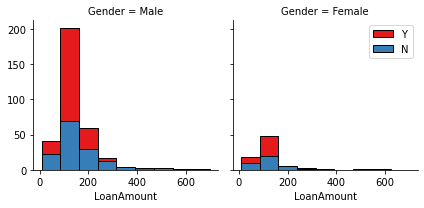

In [6]:
bins = np.linspace(loan_train.LoanAmount.min(), loan_train.LoanAmount.max(), 10) 
g = sns.FacetGrid(loan_train, col="Gender", hue="Loan_Status", palette="Set1", col_wrap=2) 
g.map(plt.hist, 'LoanAmount', bins=bins, ec="k") 
g.axes[-1].legend() 
plt.show() 

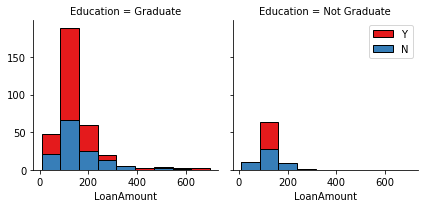

In [7]:
bins = np.linspace(loan_train.LoanAmount.min(), loan_train.LoanAmount.max(), 10) 
g = sns.FacetGrid(loan_train, col="Education", hue="Loan_Status", palette="Set1", col_wrap=2) 
g.map(plt.hist, 'LoanAmount', bins=bins, ec="k") 
g.axes[-1].legend() 
plt.show() 

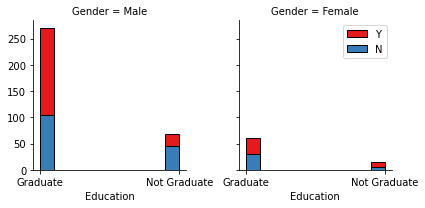

In [8]:
g = sns.FacetGrid(loan_train, col="Gender", hue="Loan_Status", palette="Set1", col_wrap=2) 
g.map(plt.hist, 'Education', ec = "k") 
g.axes[-1].legend() 
plt.show() 

## Convert Categorical Variables to Numerical Values

In [9]:
loan_train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) 
loan_train['Education'].replace(to_replace=['Graduate','Not Graduate'], value = [0,1], inplace = True)
loan_train['Self_Employed'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True) 
loan_train['Married'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
loan_train['Dependents'].replace(to_replace=['3+'], value = [3], inplace = True)
loan_train['Dependents'] = loan_train['Dependents'].astype(float)
loan_train.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
loan_train['Dependents'] = loan_train['Dependents'].fillna(loan_train['Dependents'].mean())
loan_test['Dependents'] = loan_test['Dependents'].fillna(loan_train['Dependents'].mean())
print(loan_train.isnull().sum(),loan_test.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [11]:
loan_train = loan_train.fillna(0.5)
loan_test = loan_test.fillna(0.5)
print(loan_train.isnull().sum(),loan_test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## One Hot Encoding

### Property Area

Since the variable Property_Area has more than 2 categories, we will use one hot encoding instead to convert it to numerical variables

In [12]:
loan_train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize=True) 

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: Loan_Status, dtype: float64

In [13]:
Feature = loan_train.drop(['Loan_Status','Loan_ID'], axis = 1)
Feature = pd.concat([Feature,pd.get_dummies(loan_train['Property_Area'])], axis=1) 
Feature.drop(['Property_Area'],axis = 1,inplace = True)
print(Feature.head())
print(Feature.info())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     0.0      1.0         0.0          0            1.0             5849   
1     0.0      0.0         1.0          0            1.0             4583   
2     0.0      0.0         0.0          0            0.0             3000   
3     0.0      0.0         0.0          1            1.0             2583   
4     0.0      1.0         0.0          0            1.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Rural  \
0                0.0         0.5             360.0             1.0      0   
1             1508.0       128.0             360.0             1.0      1   
2                0.0        66.0             360.0             1.0      0   
3             2358.0       120.0             360.0             1.0      0   
4                0.0       141.0             360.0             1.0      0   

   Semiurban  Urban  
0          0      1  
1          0      0  
2       

## Feature Scaling

Next, we want to normalize our predictor variables so that they have zero mean and unit variance.

In [14]:
from sklearn import preprocessing

def scale_data(data):
    scale_data = preprocessing.StandardScaler().fit(data).transform(data)
    scale_data = pd.DataFrame(scale_data)
    scale_data.columns = data.columns
    
    return scale_data

In [15]:
Scaled_Feature = scale_data(Feature)
Scaled_Feature.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,-0.49756,1.368405,-0.761490,-0.528362,0.458646,0.072991,-0.554487,-1.594333,0.314201,0.5133,-0.641478,-0.782016,1.428147
1,-0.49756,-0.734726,0.236612,-0.528362,0.458646,-0.134412,-0.038732,-0.149411,0.314201,0.5133,1.558899,-0.782016,-0.700208
2,-0.49756,-0.734726,-0.761490,-0.528362,-2.414909,-0.393747,-0.554487,-0.852040,0.314201,0.5133,-0.641478,-0.782016,1.428147
3,-0.49756,-0.734726,-0.761490,1.892641,0.458646,-0.462062,0.251980,-0.240073,0.314201,0.5133,-0.641478,-0.782016,1.428147
4,-0.49756,1.368405,-0.761490,-0.528362,0.458646,0.097728,-0.554487,-0.002086,0.314201,0.5133,-0.641478,-0.782016,1.428147


## Multicollinearity

### Measuring multicollinearity with VIF

Having multicollinearity in our model would affect its integrity. As such, we need to check for the possible presence of multicollinearity between our variables in our model.

We will be using Variance inflation factor (VIF) to measure the degree of multicollinearity between our regression variables. A high value of VIF, would indicate a high correlation between two variables, vice versa.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = Scaled_Feature.columns
  
vif_data["VIF"] = [variance_inflation_factor(Scaled_Feature.values, i)
                          for i in range(len(Scaled_Feature.columns))]
  
print(vif_data)

              feature       VIF
0              Gender  1.179893
1             Married  1.286529
2          Dependents  1.161848
3           Education  1.075513
4       Self_Employed  1.025740
5     ApplicantIncome  1.549572
6   CoapplicantIncome  1.135180
7          LoanAmount  1.622856
8    Loan_Amount_Term  1.049503
9      Credit_History  1.017193
10              Rural       inf
11          Semiurban       inf
12              Urban       inf


C:\Users\Gordon\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [17]:
Scaled_Feature.drop(['Semiurban'],axis = 1,inplace = True)

vif_data2 = pd.DataFrame()
vif_data2["feature"] = Scaled_Feature.columns
  
vif_data2["VIF"] = [variance_inflation_factor(Scaled_Feature.values, i)
                          for i in range(len(Scaled_Feature.columns))]
  
print(vif_data2)

              feature       VIF
0              Gender  1.179893
1             Married  1.286529
2          Dependents  1.161848
3           Education  1.075513
4       Self_Employed  1.025740
5     ApplicantIncome  1.549572
6   CoapplicantIncome  1.135180
7          LoanAmount  1.622856
8    Loan_Amount_Term  1.049503
9      Credit_History  1.017193
10              Rural  1.279758
11              Urban  1.284975


In [18]:
X_train = Scaled_Feature.values
y_train = loan_train['Loan_Status'].values

## Selection of Model using Cross-Validation

In [19]:
# Import Necessary Libraries
from sklearn.model_selection import cross_val_score

### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split 
X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split (X_train, y_train, test_size=0.2, random_state 
= 4) 
print('Train set:', X_subtrain.shape, y_subtrain.shape) 
print('Test set:', X_subtest.shape, y_subtest.shape)

Train set: (491, 12) (491,)
Test set: (123, 12) (123,)


### KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

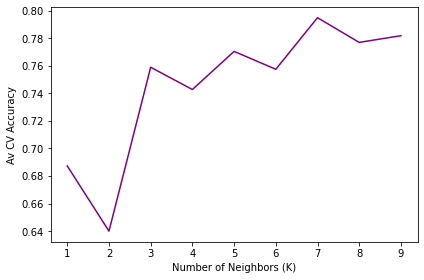

The model has the best accuracy score of  0.7948968799576944 with a k value of 7


In [22]:
# 10-Fold Cross validation
k = 10 
mean_acc = np.zeros((k-1)) 
std_acc = np.zeros((k-1)) 
for n in range(1,k): 
    KNN = KNeighborsClassifier(n_neighbors = n)
    mean_acc[n-1] = np.mean(cross_val_score(KNN, X_train, y_train, cv=10))

plt.plot(range(1,k), mean_acc, 'purple')  
plt.ylabel('Av CV Accuracy')  
plt.xlabel('Number of Neighbors (K)')  
plt.tight_layout()  
plt.show()  

print("The model has the best accuracy score of ", mean_acc.max(), "with a k value of", mean_acc.argmax()+1) 

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
RFC_accuracy = np.mean(cross_val_score(RFC, X_train, y_train, cv=10))

print("Accuracy of Random Forest Classifier is ", RFC_accuracy)

Accuracy of Random Forest Classifier is  0.778609201480698


## Predicting Loan Status

We will select the KNN Classifier with k = 7 since it has a higher accuracy rate

### Transform and select variables from test data

In [24]:
loan_test = pd.concat([loan_test,pd.get_dummies(loan_test['Property_Area'])], axis=1) 
loan_test.drop(['Loan_ID','Semiurban','Property_Area'],axis = 1,inplace = True)
print(loan_test.head())
print(loan_test.info())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male     Yes          0      Graduate            No             5720   
1   Male     Yes          1      Graduate            No             3076   
2   Male     Yes          2      Graduate            No             5000   
3   Male     Yes          2      Graduate            No             2340   
4   Male      No          0  Not Graduate            No             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Rural  \
0                  0       110.0             360.0             1.0      0   
1               1500       126.0             360.0             1.0      0   
2               1800       208.0             360.0             1.0      0   
3               2546       100.0             360.0             0.5      0   
4                  0        78.0             360.0             1.0      0   

   Urban  
0      1  
1      1  
2      1  
3      1  
4      1  
<class 'pandas

In [25]:
loan_test['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True) 
loan_test['Education'].replace(to_replace=['Graduate','Not Graduate'], value = [0,1], inplace = True)
loan_test['Self_Employed'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True) 
loan_test['Married'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
loan_test['Dependents'].replace(to_replace=['3+'], value = [3], inplace = True)
loan_test['Dependents'] = loan_test['Dependents'].astype(float)
loan_test.dtypes

Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Rural                  uint8
Urban                  uint8
dtype: object

In [26]:
scaled_loan_test = scale_data(loan_test)

In [30]:
# RFC_pred = RFC.fit(X_train, y_train)
# test_pred=RFC_pred.predict(scaled_loan_test) 
# Test_file = Test_file.assign(Loan_Status = test_pred)
# Test_file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [34]:
KNN7 = KNeighborsClassifier(n_neighbors = 7)
KNN7 = KNN.fit(X_train, y_train)
test_pred = KNN5.predict(scaled_loan_test)
Test_file = Test_file.assign(Loan_Status = test_pred)
Test_file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [35]:
submission = Test_file[['Loan_ID', 'Loan_Status']]
submission.head()
submission.to_csv('submission_KNN5_CV.csv', index=False)